<a href="https://colab.research.google.com/github/anthonysfancher/fantasy-football/blob/main/DownloadYahooFFSingleLeagueData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a jupyter notebook hosted in google colab. 

This is simply long Python script that is broken up into sections that can be run individually.  You need to every gray box of commands, in order. You can run it by pressing shift+enter while you have the box selected.  Start by running the imports section.

# Imports

In [1]:
!pip install xmltodict
import requests
import xmltodict
from datetime import datetime
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pprint
import ast
import json
pp = pprint.PrettyPrinter(indent=2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get a token
Go to this website, login with Yahoo, and then copy the Access Token
https://lemon-dune-0cd4b231e.azurestaticapps.net/.

Paste the Authentication Toekn in the belown command, replacing the existing token.

In [2]:
token = "k9YNYOqapVg6xgClZMDyMsOwWZU3cD1tIvOq5LZkc1wwIpcgW_X64iL0mvTBDqK_wlfePjKKIyOxvnq8YYhxwNRnXXEVHExoAIAZOJ.F2mIpgaF5qYK4rG2S0aXSVY_ecZSqATq1CBN3kw8ouYrR4ekcnlUiTJHQ68_IXf1SpxhDa7Mg1Vg2OCWVbhg997TUsA16lJBmwaAnP7qkXp.2qucqlDhgQN2g3F9YEXD.P8t73AXQ38QMRYIjzdjnugcTQw46d2vhWLpOj7eoM745gSbmLQ_FfrRoUTYBaoB3EOQ1kENM6TH3wVF4..GSJUDul7AK29YrvUwoqPXG.YlpOta38jBm8uKTw28zAOFLXQ8vzB.aAt0aJrc08E.GHczpAho7MBlsdmq8BsX3AlS1nJowWMDEgEUaXAqeQ.rLpAyIYZKXrcVM4nRRiiHv3ul0i82BnMglTpHlBNGmqR_x43txbTvj5N39DbfZyM.fkxRJ0IRD0XzC3YcsUEQ7pVvd9oTgBxVoq.GVefnjHdg24I71ejVQYBBSWq7DZhYghdWSbg5X8.Oq8jjnSvwSjNX6oWdKYyBhlt.enIpgPAyddP7ua8pJ6RNSa4x7NXtVh6r.WmXdA3QwsZyClCf6P1dgz73EuS7kz1ai3bo5wjYxqQFSs2qX2kPnKhimM0xKi_WEEl8Eps9RyOwNnKiJBHuDvsI3ZYE4GT.u0UM7ZN4tAzlcVGAA4_xV_t_X2p2mh55jqGJI55uYWpKKYiAzOVUntXWFCEj4fLUrPgk._9QZ7QZftvRgslNoq4tB1I8vyKuz3MDTSe0JPeW8m6uy7X1ehaQkTLjqNG_.ekgyZf8NPmsJzacrdfdIJ906IjT7KqVRzQyjeUJizrgnFmDrqpmLH7rGps4InfIJ0I_GycNn6i0qkSQ1aBLr8Z1FtnBz288-"
authorization = "Bearer " + token
headers = {'Authorization': authorization}


## Get League Data for Signed in User

In [3]:
uri = "https://fantasysports.yahooapis.com/fantasy/v2/users;use_login=1/games/leagues"
r = requests.get(uri, headers=headers)
pp.pprint(r)
leagues_content = xmltodict.parse(r.text)

<Response [200]>


In [4]:
games = leagues_content["fantasy_content"]["users"]["user"]["games"]["game"]
league_dicts = []
for game in games:
    if  "leagues" in game and game["leagues"] != None:
        game_leagues = game["leagues"]["league"]
        if not isinstance(game_leagues, list):
            game_leagues = [game_leagues]
        for league in game_leagues:
            league_dict = {
                "league_key": league["league_key"],
                "name": league["name"],
                "game_code": league["game_code"],
                "season": league["season"],
                "num_teams": league["num_teams"]
            }
            league_dicts.append(league_dict)
leagues_df = pd.DataFrame(league_dicts,
                     columns=['league_key', 'name', 'game_code','season','num_teams'])
leagues_df

,league_key,name,game_code,season,num_teams
0,153.l.709122,Mayberry FFL,nfl,2006,8
1,175.l.696127,Libertyville Football League,nfl,2007,10
2,199.l.449265,Libertyville men's club,nfl,2008,10
3,211.l.140736,Made Men,nba,2008,12
4,211.l.161539,Libertyville's Township,nba,2008,1
5,222.l.605763,Libertyville men's club,nfl,2009,10
6,242.l.695609,Libertyville's Finest League,nfl,2010,12
7,257.l.450074,mike is in charge again,nfl,2011,10
8,273.l.237929,Libertyville mens club,nfl,2012,10
9,273.l.838679,Iowa City Boys,nfl,2012,12


Choose a single league key from above copy it and paste in the below script, replacing the current league key.  The league key you choose is the league whose data you're pulling.

In [30]:
league_key =  "414.l.194005"

# denver league_keys = ["390.l.1031063", "399.l.301184", "406.l.151652", "414.l.598560"]
# IC league_keys = ["273.l.838679","331.l.661280","348.l.464735","359.l.18316","371.l.24819","380.l.951129","390.l.763777","399.l.627892","406.l.779300", "414.l.194005"]
# LVILLE league_keys = ["348.l.330085","359.l.53710","371.l.829067","380.l.245120","390.l.495602","399.l.304191", "406.l.611874"]

season = leagues_df[leagues_df["league_key"] == league_key]["season"].values[0]
file_suffix = season

## Get League Settings

That's all the input this needs from you.  The league_key was the last value you needed to set.  So now, you could run the rest of the lines by selecting "Runtime"->"Run after" from the top menu 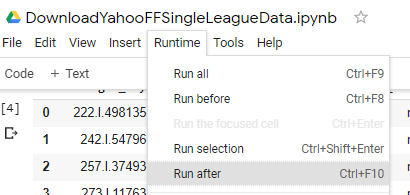

In [31]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/settings"   
r = requests.get(uri, headers=headers)
pp.pprint(r)
settings_content = xmltodict.parse(r.text)

<Response [200]>


In [32]:
stat_map = {}
for stat in settings_content["fantasy_content"]["leagues"]["league"]["settings"]["stat_categories"]["stats"]["stat"]:
    stat_map[stat['stat_id']] = stat['name']

In [33]:
league_settings = {}
playoffsStartWeek = settings_content['fantasy_content']['leagues']['league']['settings']["playoff_start_week"]
league_settings["playoff_startweek"] = playoffsStartWeek
positions = []
for position in settings_content['fantasy_content']['leagues']['league']['settings']['roster_positions']['roster_position']:
    for i in range(0,int(position['count'])):
        positions.append(position['position'])
league_settings["positions"] = positions

In [34]:
with open(f'league_settings_{file_suffix}.json', 'w') as f:
    json.dump(league_settings, f)

## Get Teams Data

In [35]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/standings"
r = requests.get(uri, headers=headers)
pp.pprint(r)
teams_content = xmltodict.parse(r.text)

<Response [200]>


In [36]:
league = teams_content["fantasy_content"]["leagues"]["league"]
start_date = datetime.strptime(league["start_date"], '%Y-%m-%d')
start_week = int(league["start_week"])
end_week = int(league["end_week"]) # could use current week as end if mid year

team_dicts = []
for team in league["standings"]["teams"]["team"]:
    manager = team["managers"]["manager"]
    if isinstance(manager, list):
        manager = manager[0]
    team_dict = {
        "name": team["name"],
        "team_key": team["team_key"],
        "number_of_moves": int(team["number_of_moves"]),
        "number_of_trades": int(team["number_of_trades"]),
        "clinched_playoffs": "clinched_playoffs" in team and team["clinched_playoffs"] == "1",
        "manager_name": manager["nickname"],
        "division_id": team["division_id"] if 'division_id' in team else None,
        "draft_grade": team["draft_grade"] if "draft_grade" in team else None,
        "rank": int(team["team_standings"]["rank"]),
        "points_for": float(team["team_standings"]["points_for"]),
        "points_against": float(team["team_standings"]["points_against"]),
        "wins": int(team["team_standings"]["outcome_totals"]["wins"]),
        "losses": int(team["team_standings"]["outcome_totals"]["losses"]),
    }
    team_dicts.append(team_dict)
teams_df = pd.DataFrame(team_dicts)

In [37]:
def get_nickname(team_key):
    return teams_df[teams_df["team_key"] == team_key]["manager_name"].values[0]

In [38]:
teams_df.to_csv(f"teams_{file_suffix}.csv", index=False)

## Get Player Data
1. Get Rosters
2. Get Player Stats
3. Merge info

In [39]:
team_keys = ",".join(teams_df["team_key"])
baseUri = f"https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys={team_keys}/roster"
roster_content_list = []
for i in range(start_week, end_week + 1):
    uri = baseUri + ";week=" + str(i)
    r = requests.get(uri, headers=headers)
    pp.pprint(r)
    roster_content = xmltodict.parse(r.text)
    roster_content_list.append(roster_content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [40]:
player_dicts = []
for roster_content in roster_content_list:
    for team in roster_content["fantasy_content"]["teams"]["team"]:
        team_key = team["team_key"]
        week = team["roster"]["week"]
        for player in team["roster"]["players"]["player"]:
            player_dict = {
                "player_key": player["player_key"],
                "name": player["name"]["full"],
                "position": player["primary_position"],
                "week": int(player["selected_position"]["week"]),
                "started": player["selected_position"]['position'] == player["primary_position"] or player["selected_position"]['is_flex'] == '1',
                "team_key": team_key,
                "manager_name": get_nickname(team_key)
            }
            player_dicts.append(player_dict)
players_df = pd.DataFrame(player_dicts)
players_df.head(5)

,player_key,name,position,week,started,team_key,manager_name
0,414.p.32723,Jalen Hurts,QB,1,True,414.l.194005.t.7,Alex
1,414.p.30994,DJ Moore,WR,1,True,414.l.194005.t.7,Alex
2,414.p.30175,JuJu Smith-Schuster,WR,1,True,414.l.194005.t.7,Alex
3,414.p.30161,Joe Mixon,RB,1,True,414.l.194005.t.7,Alex
4,414.p.32705,D'Andre Swift,RB,1,True,414.l.194005.t.7,Alex


In [41]:
player_keys = players_df.player_key.unique()
player_stats_contents = []
for week in range(start_week, end_week + 1):
    # max page size is 25
    print(f"downloading week {week}")
    for i in range(0,len(player_keys),25):
        player_keys_subset_str = ",".join(player_keys[i:i+25])
        uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/players;player_keys={player_keys_subset_str}/stats;type=week;week={week}"   
        r = requests.get(uri, headers=headers)
        pp.pprint(r)
        player_stats_content = xmltodict.parse(r.text)
        player_stats_contents.append(player_stats_content)

downloading week 1
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 2
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 3
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 4
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 5
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Res

In [42]:
player_stats_dicts = []
for player_stats_content in player_stats_contents:
    for player_stats in player_stats_content["fantasy_content"]["leagues"]["league"]["players"]["player"]:
        player_stats_dict = {
            'player_key': player_stats["player_key"],
            'week': int(player_stats["player_stats"]["week"]),
            'points': float(player_stats["player_points"]["total"]),
            'name': player_stats["name"]["full"]
        }
        for stat in player_stats["player_stats"]["stats"]["stat"]:
            stat_name = stat_map[stat['stat_id']]
            stat_value = ast.literal_eval(stat['value'])
            player_stats_dict[stat_name] = stat_value
        player_stats_dicts.append(player_stats_dict)
player_stats_df = pd.DataFrame(player_stats_dicts)
player_stats_df.head(5)

,player_key,week,points,name,Passing Yards,Passing Touchdowns,Interceptions,Rushing Attempts,Rushing Yards,Rushing Touchdowns,...,Block Kick,Kickoff and Punt Return Touchdowns,Points Allowed 0 points,Points Allowed 1-6 points,Points Allowed 7-13 points,Points Allowed 14-20 points,Points Allowed 21-27 points,Points Allowed 28-34 points,Points Allowed 35+ points,Extra Point Returned
0,414.p.32723,1,24.72,Jalen Hurts,243.0,0.0,0.0,17.0,90.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,414.p.30994,1,6.50,DJ Moore,0.0,0.0,0.0,1.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,414.p.30175,1,8.90,JuJu Smith-Schuster,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,414.p.30161,1,18.00,Joe Mixon,0.0,0.0,0.0,27.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,414.p.32705,1,25.00,D'Andre Swift,0.0,0.0,0.0,15.0,144.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
player_stats_content

{'fantasy_content': {'@xml:lang': 'en-US',
  '@yahoo:uri': 'http://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys=414.l.194005/players;player_keys=414.p.31457,414.p.33437,414.p.32417,414.p.100001,414.p.27590,414.p.100022,414.p.32727,414.p.100028,414.p.28390,414.p.33989,414.p.31969,414.p.32003,414.p.29785,414.p.33113,414.p.30227,414.p.34010,414.p.33967,414.p.32018,414.p.34357,414.p.100026,414.p.30150,414.p.34320,414.p.30125,414.p.32036,414.p.100013/stats;type=week;week=17',
  '@time': '59.08203125ms',
  '@copyright': 'Data provided by Yahoo! and STATS, LLC',
  '@refresh_rate': '60',
  '@xmlns:yahoo': 'http://www.yahooapis.com/v1/base.rng',
  '@xmlns': 'http://fantasysports.yahooapis.com/fantasy/v2/base.rng',
  'leagues': {'@count': '1',
   'league': {'league_key': '414.l.194005',
    'league_id': '194005',
    'name': 'IC Boys 4 Life',
    'url': 'https://football.fantasysports.yahoo.com/f1/194005',
    'logo_url': 'https://yahoofantasysports-res.cloudinary.com/image/upload/

In [44]:
players_df = pd.merge(players_df, player_stats_df, how='outer', left_on=['player_key','week', 'name'], right_on = ['player_key', 'week', 'name'])
players_df.head(5)

,player_key,name,position,week,started,team_key,manager_name,points,Passing Yards,Passing Touchdowns,...,Block Kick,Kickoff and Punt Return Touchdowns,Points Allowed 0 points,Points Allowed 1-6 points,Points Allowed 7-13 points,Points Allowed 14-20 points,Points Allowed 21-27 points,Points Allowed 28-34 points,Points Allowed 35+ points,Extra Point Returned
0,414.p.32723,Jalen Hurts,QB,1,True,414.l.194005.t.7,Alex,24.72,243.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,414.p.30994,DJ Moore,WR,1,True,414.l.194005.t.7,Alex,6.50,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,414.p.30175,JuJu Smith-Schuster,WR,1,True,414.l.194005.t.7,Alex,8.90,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,414.p.30161,Joe Mixon,RB,1,True,414.l.194005.t.7,Alex,18.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,414.p.32705,D'Andre Swift,RB,1,True,414.l.194005.t.7,Alex,25.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
players_df.to_csv(f"players_{file_suffix}.csv", index=False)

## Get Trades

In [46]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key};out=transactions"
r = requests.get(uri, headers=headers)
pp.pprint(r)
trades_content = xmltodict.parse(r.text)

<Response [200]>


In [47]:
trades = [trade for trade in trades_content["fantasy_content"]["leagues"]["league"]["transactions"]["transaction"] if trade["type"] == "trade"]
trade_dicts = []

for trade in trades:
    trader_player_keys_received = []
    tradee_player_keys_received = []
    trader_player_names_received = []
    tradee_player_names_received = []
    trader_picks_received = []
    tradee_picks_received = []
    trader_team_key = trade["trader_team_key"]
    if "players" in trade:
        players = trade["players"]["player"]
        # single instance if only one player traded    
        if not isinstance(players, list):
            players = [players]
        for player in players:
            name = player["name"]["full"]
            player_key = player["player_key"]
            if player["transaction_data"]["destination_team_key"] == trader_team_key:
                trader_player_names_received.append(name)
                trader_player_keys_received.append(player_key)
            else:
                tradee_player_names_received.append(name)
                tradee_player_keys_received.append(player_key)
    if "picks" in trade:
        for pick in trade["picks"]["pick"]:
            pick_round = int(pick["round"])
            if pick["destination_team_key"] == trader_team_key:
                trader_picks_received.append(pick_round)
            else:
                tradee_picks_received.append(pick_round)
    timestamp = int(trade["timestamp"])
    date = datetime.fromtimestamp(timestamp)
    delta = date - start_date
    week_enacted = delta.days // 7
    trade_dict = {
        "trader_team_key": trader_team_key,
        "trader_nickname": get_nickname(trader_team_key),
        "tradee_team_key": trade["tradee_team_key"],
        "tradee_nickname": get_nickname(trade["tradee_team_key"]),
        "trader_player_keys_received": trader_player_keys_received,
        "trader_player_names_received": trader_player_names_received,
        "tradee_player_keys_received": tradee_player_keys_received,
        "tradee_player_names_received": tradee_player_names_received,
        "trader_picks_received": trader_picks_received,
        "tradee_picks_received": tradee_picks_received,
        "week_enacted": week_enacted,
        "date": date
    }
    trade_dicts.append(trade_dict)
trades_df = pd.DataFrame(trade_dicts)
trades_df


,trader_team_key,trader_nickname,tradee_team_key,tradee_nickname,trader_player_keys_received,trader_player_names_received,tradee_player_keys_received,tradee_player_names_received,trader_picks_received,tradee_picks_received,week_enacted,date
0,414.l.194005.t.9,Richard,414.l.194005.t.12,Diego,"[414.p.30157, 414.p.33138]","[Gerald Everett, James Robinson]","[414.p.34007, 414.p.31833]","[George Pickens, Kyler Murray]",[],[],9,2022-11-15 17:53:23
1,414.l.194005.t.2,Steve,414.l.194005.t.3,Michael,[414.p.33412],[Najee Harris],"[414.p.32702, 414.p.31896]","[Clyde Edwards-Helaire, DK Metcalf]",[],[],6,2022-10-22 21:27:02


In [48]:
trades_df.to_csv(f"trades_{file_suffix}.csv", index=False)

In [49]:
add_drops = [transaction for transaction in trades_content["fantasy_content"]["leagues"]["league"]["transactions"]["transaction"] if transaction["type"] == "add/drop"]
add_drop_dicts = []

for add_drop in add_drops:
    player_keys_added = []
    player_keys_dropped = []
    player_names_added = []
    player_names_dropped = []
    manager_team_key = None
    if "players" in add_drop:
        players = add_drop["players"]["player"]
        # single instance if only one player traded    
        if not isinstance(players, list):
            players = [players]
        for player in players:
            name = player["name"]["full"]
            player_key = player["player_key"]
            if player["transaction_data"]["type"] == "add":
                player_names_added.append(name)
                player_keys_added.append(player_key)
                if manager_team_key == None:
                    manager_team_key = player["transaction_data"]["destination_team_key"]
            else:
                player_names_dropped.append(name)
                player_keys_dropped.append(player_key)
    timestamp = int(add_drop["timestamp"])
    date = datetime.fromtimestamp(timestamp)
    delta = date - start_date
    week_enacted = delta.days // 7
    add_drop_dict = {
        "manager_team_key": manager_team_key,
        "manager_nickname": get_nickname(manager_team_key),
        "player_keys_added": player_keys_added,
        "player_names_added": player_names_added,
        "player_keys_dropped": player_keys_dropped,
        "player_names_dropped": player_names_dropped,
        "week_enacted": week_enacted,
        "date": date
    }
    add_drop_dicts.append(add_drop_dict)
add_drop_df = pd.DataFrame(add_drop_dicts)
add_drop_df


,manager_team_key,manager_nickname,player_keys_added,player_names_added,player_keys_dropped,player_names_dropped,week_enacted,date
0,414.l.194005.t.5,Ryan,[414.p.30136],[Evan Engram],[414.p.31127],[Tyler Conklin],13,2022-12-10 18:42:52
1,414.l.194005.t.2,Steve,[414.p.34036],[Greg Dulcich],[414.p.30614],[Taysom Hill],13,2022-12-10 18:02:56
2,414.l.194005.t.12,Diego,[414.p.31228],[Mike Boone],[414.p.33114],[Tony Jones Jr.],13,2022-12-09 20:49:40
3,414.l.194005.t.12,Diego,[414.p.33114],[Tony Jones Jr.],[414.p.31919],[Damien Harris],13,2022-12-09 20:47:12
4,414.l.194005.t.7,Alex,[414.p.33514],[Chuba Hubbard],[414.p.32018],[Ty Johnson],13,2022-12-09 19:24:31
...,...,...,...,...,...,...,...,...
212,414.l.194005.t.9,Richard,[414.p.34088],[Romeo Doubs],[414.p.33989],[Christian Watson],0,2022-09-09 20:20:04
213,414.l.194005.t.9,Richard,[414.p.33989],[Christian Watson],[414.p.31008],[Ronald Jones],0,2022-09-09 19:51:29
214,414.l.194005.t.1,Tony F,[414.p.26800],[Dustin Hopkins],[414.p.33389],[Trevor Lawrence],0,2022-09-09 03:14:19
215,414.l.194005.t.7,Alex,[414.p.28514],[Mike Davis],[414.p.32675],[Tua Tagovailoa],0,2022-09-08 02:43:46


In [50]:
add_drop_df.to_csv(f"add_drops_{file_suffix}.csv", index=False)

## Get Matchups

In [51]:
team_keys = ",".join(teams_df["team_key"])
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys={team_keys}/matchups"
r = requests.get(uri, headers=headers)
pp.pprint(r)
matchups_content = xmltodict.parse(r.text)

<Response [200]>


In [52]:
matchup_dicts = []
for team in matchups_content["fantasy_content"]["teams"]["team"]:
    for matchup in team["matchups"]["matchup"]:
        team_1 = matchup["teams"]["team"][0]
        matchup_dict = {
            "week": int(matchup['week']),
            "is_playoffs": matchup["is_playoffs"] == "1",
            "is_consolation": matchup["is_consolation"] == "1",
            "team_1_key": team_1["team_key"],
            "team_1_nickname": get_nickname(team_1["team_key"]), 
            "team_1_points": float(team_1["team_points"]["total"]),
            "team_1_projected_points": float(team_1["team_projected_points"]["total"])
        }
        if matchup["teams"]["@count"] == "1":
            matchup_dict["is_bye"] = True
        else:
            matchup_dict["is_bye"] = False
            team_2 = matchup["teams"]["team"][1]
            matchup_dict["team_2_key"] = team_2["team_key"]
            matchup_dict["team_2_nickname"] = get_nickname(team_2["team_key"])
            matchup_dict["team_2_points"] = team_2["team_points"]["total"]
            matchup_dict["team_2_projected_points"] = team_2["team_projected_points"]["total"]
        matchup_dicts.append(matchup_dict)
matchups_df = pd.DataFrame(matchup_dicts)
matchups_df.head(5)

,week,is_playoffs,is_consolation,team_1_key,team_1_nickname,team_1_points,team_1_projected_points,is_bye,team_2_key,team_2_nickname,team_2_points,team_2_projected_points
0,1,False,False,414.l.194005.t.7,Alex,104.22,112.60,False,414.l.194005.t.12,Diego,102.30,114.95
1,2,False,False,414.l.194005.t.7,Alex,110.12,117.31,False,414.l.194005.t.8,imran,141.22,120.13
2,3,False,False,414.l.194005.t.7,Alex,90.60,110.57,False,414.l.194005.t.5,Ryan,113.10,110.34
3,4,False,False,414.l.194005.t.7,Alex,107.56,110.47,False,414.l.194005.t.11,isaiah m,101.90,87.18
4,5,False,False,414.l.194005.t.7,Alex,108.36,111.55,False,414.l.194005.t.2,Steve,82.18,106.60


In [53]:
matchups_df.to_csv(f"matchups_{file_suffix}.csv", index=False)

## Download files

Run the following script to download all files created from this notebook.  You'll need to give permission to your browser to download multiple files.  Put all files in a dedicated folder for ease of upload.



In [54]:
from google.colab import files
files.download(f'players_{file_suffix}.csv')
files.download(f"teams_{file_suffix}.csv")
files.download(f"trades_{file_suffix}.csv")
files.download(f"add_drops_{file_suffix}.csv")
files.download(f"matchups_{file_suffix}.csv")
files.download(f"league_settings_{file_suffix}.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>